<a href="https://colab.research.google.com/github/pipuf/ml_dev_cert/blob/main/13_1_2_Extra_THEORY_PCA%2C_t_SNE%2C_UMAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comparing PCA, t-SNE, and UMAP for Dimensionality Reduction on MNIST

This code applies **Principal Component Analysis (PCA)**, **t-Distributed Stochastic Neighbor Embedding (t-SNE)**, and **Uniform Manifold Approximation and Projection (UMAP)** to the **MNIST dataset** to visually compare the performance of each dimensionality reduction method. The goal is to reduce the original 784-dimensional MNIST data (28x28 pixel images) to 2 dimensions and visualize the digit clusters.


###  **Dataset**
- The **MNIST dataset** is fetched using `fetch_openml`, which contains 70,000 grayscale images of handwritten digits (0-9). Each image is a 28x28 pixel image, flattened into a 784-dimensional vector.
- We use only the first **2000 samples** to reduce computational complexity and time.
- **Standardization**: The data is standardized using `StandardScaler` to ensure that each feature (pixel value) has a mean of 0 and a standard deviation of 1. This is important for methods like PCA, t-SNE, and UMAP, which are sensitive to differences in scale between features.

### **Principal Component Analysis (PCA)**
- **PCA** is a linear dimensionality reduction method that reduces the dataset by projecting it onto the directions (principal components) that capture the maximum variance.
- In this code, PCA is applied to reduce the **784-dimensional MNIST data to 2 dimensions**.
- The goal is to capture the most variance in the data using just two dimensions, which allows us to visualize the digit clusters. However, PCA can struggle with complex non-linear relationships and often fails to separate non-linearly separable clusters like digits in MNIST.

- PCA identifies the directions (principal components) in which the variance of the data is maximized.
- PCA works well for linearly separable data but might not capture non-linear structures in complex datasets like MNIST.

### **t-Distributed Stochastic Neighbor Embedding (t-SNE)**
- **t-SNE** is a non-linear dimensionality reduction technique designed specifically for data visualization. It aims to preserve local structures in the data, i.e., points that are close in high-dimensional space should remain close in the reduced-dimensional space.
- In this code, t-SNE reduces the MNIST data from 784 dimensions to **2 dimensions** for visualization.
- The `perplexity` parameter (set to 30) controls how t-SNE balances local and global structure. A higher perplexity value would focus more on global structure, while a lower value would focus on preserving local relationships.

- t-SNE models the similarity between pairs of points using conditional probabilities in both high-dimensional and low-dimensional space, and it tries to minimize the Kullback-Leibler divergence between these two distributions.
- t-SNE is excellent for visualizing small clusters and non-linear relationships but may distort distances between large clusters (global structure).

### 5. **Uniform Manifold Approximation and Projection (UMAP)**
- **UMAP** is a non-linear dimensionality reduction method that, like t-SNE, is used to visualize high-dimensional data. UMAP constructs a graph representation of the data in high dimensions and optimizes its low-dimensional projection to preserve both local and global structure.
- In this code, UMAP is applied to reduce the MNIST data from 784 dimensions to **2 dimensions**. The `n_neighbors` (set to 10) controls how UMAP balances between local and global structure, while `min_dist` (set to 0.1) controls how tightly points are packed in the low-dimensional space.


- UMAP builds a weighted graph in high-dimensional space using nearest neighbors, then uses an optimization process to create a low-dimensional representation.
- UMAP preserves more of the global structure than t-SNE and tends to be faster, making it well-suited for large datasets.

### **Visualization**
- The `plot_reduction` function is used to visualize the results of PCA, t-SNE, and UMAP. It takes the 2D data produced by each method and creates a scatter plot where each point represents a digit (0-9).
- The points are color-coded based on the digit they represent, and a legend is added to show which color corresponds to which digit.
  
- **PCA** might produce overlapping clusters, as it can’t capture non-linear separations between the digit classes.
- **t-SNE** will likely form tight, well-separated clusters for each digit but may distort the relative distances between clusters.
- **UMAP** will balance local and global structure, showing clusters of digits while preserving some of the global relationships between them.

MNIST Dataset - PCA, t-SNE, UMAP


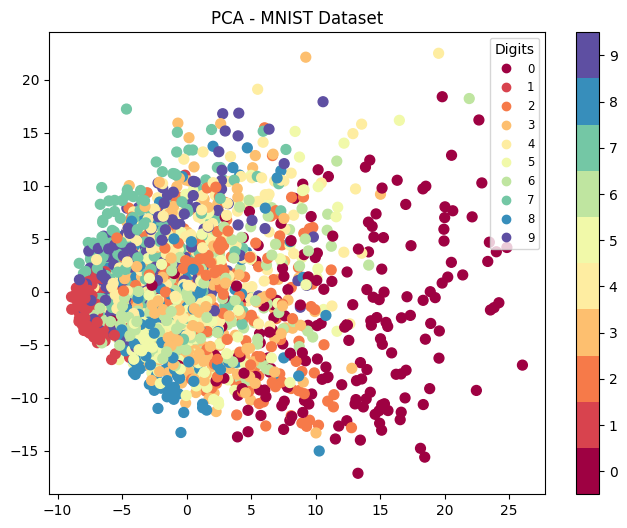

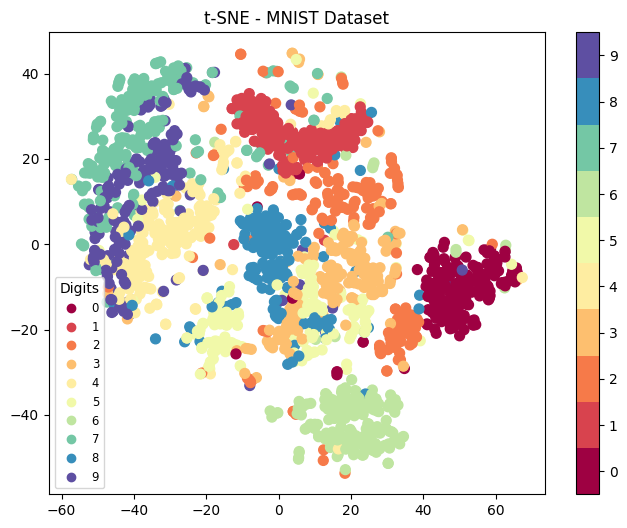

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


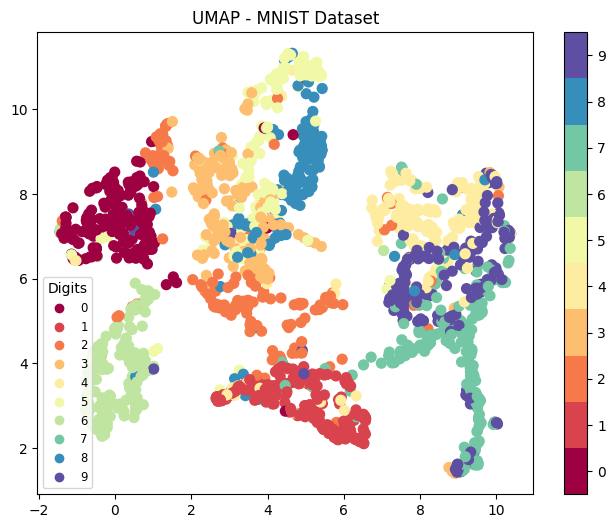

In [ ]:
# Install UMAP in Colab if not already installed
!pip install umap-learn

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_openml

# Helper function to plot the results with descriptive cluster names
def plot_reduction(X, y, title, method, labels):
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='Spectral', s=50)
    plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
    handles, _ = scatter.legend_elements(prop="colors")
    legend = plt.legend(handles, labels, title="Digits", loc="best", fontsize='small')
    plt.title(f"{method} - {title}")
    plt.show()

# Define the digit labels for MNIST (0-9)
digit_labels = [str(i) for i in range(10)]

# Load MNIST dataset (subset to 2000 samples to reduce computation time)
mnist = fetch_openml(name="mnist_784", version=1)
X_mnist = mnist.data[:2000]
y_mnist = mnist.target[:2000].astype(int)

# Standardize the MNIST data
scaler = StandardScaler()
X_mnist = scaler.fit_transform(X_mnist)

# Dimensionality Reduction on MNIST Dataset
print("MNIST Dataset - PCA, t-SNE, UMAP")

# PCA
pca_mnist = PCA(n_components=2)
X_pca_mnist = pca_mnist.fit_transform(X_mnist)
plot_reduction(X_pca_mnist, y_mnist, "MNIST Dataset", "PCA", digit_labels)

# t-SNE
tsne_mnist = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne_mnist = tsne_mnist.fit_transform(X_mnist)
plot_reduction(X_tsne_mnist, y_mnist, "MNIST Dataset", "t-SNE", digit_labels)

# UMAP
umap_mnist = umap.UMAP(n_neighbors=10, min_dist=0.1, random_state=42)
X_umap_mnist = umap_mnist.fit_transform(X_mnist)
plot_reduction(X_umap_mnist, y_mnist, "MNIST Dataset", "UMAP", digit_labels)
